In [1]:
import numpy as np
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph, planted_partition_graph,random_partition_graph
from networkx.algorithms import community
import os
import math

import functools

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
G = LFR_benchmark_graph(1000,2.5,1.5,0.2,average_degree=20,max_degree= 50,min_community= 20,max_community= 50)

In [3]:
communities = {frozenset(G.nodes[v]["community"]) for v in G}


In [6]:
for i in communities:
    print(" ".join(list(map(lambda x: str(x), i))))

578 68 146 405 85 601 218 864 224 357 998 122 872 363 304 560 945 501 182 55 117 58
642 194 772 453 136 138 654 910 464 470 474 412 478 675 548 677 739 355 102 631 495 882 630 439 118 62
640 389 9 13 279 407 799 545 417 679 168 40 427 814 308 311 952 569 953 315 187 190 703 191 321 963 200 73 72 715 332 714 80 212 853 87 990 614 486 362 876 879 246 762 893 511
516 262 905 523 12 399 143 527 785 659 404 147 789 924 797 156 31 929 930 676 421 37 934 936 164 42 820 440 57 697 571 700 61 320 962 709 71 586 334 463 977 857 985 858 227 490 374 503 254 127
782 784 531 422 423 296 683 685 430 689 306 563 692 309 436 823 570 445 702 319 63 840 456 77 981 475 476 220 219 992 481 97 741 229 101 616 232 371 628 887 509
897 3 195 711 968 393 10 778 974 207 597 341 666 732 926 288 674 162 870 41 233 759 940 303 175 623 438 183 56 895
133 5 839 906 76 721 149 278 663 792 281 725 213 540 798 287 802 418 933 680 810 428 885
128 896 704 131 324 967 328 970 11 268 779 144 724 340 284 669 737 444 356 228 

In [29]:
for i in G:
    print(list(G.nodes[i]["community"]))

[896, 513, 256, 645, 133, 0, 523, 18, 272, 276, 535, 19, 278, 690, 565, 53, 696, 188, 321, 323, 330, 77, 978, 210, 214, 855, 984, 730, 346, 220, 349, 739, 360, 365, 754, 370, 757, 247, 892, 253, 638]
[1, 913, 274, 21, 662, 791, 665, 156, 413, 291, 163, 37, 428, 430, 691, 309, 566, 54, 184, 313, 186, 194, 708, 198, 70, 329, 203, 344, 478, 95, 870, 742, 614, 235, 246, 893]
[2, 387, 789, 22, 23, 29, 800, 416, 929, 931, 164, 36, 172, 63, 448, 68, 71, 715, 727, 857, 477, 239]
[130, 3, 915, 409, 282, 26, 660, 158, 417, 34, 165, 166, 680, 40, 555, 812, 683, 814, 819, 439, 567, 57, 574, 840, 328, 591, 467, 907, 354, 867, 100, 743, 251, 628, 500, 507]
[768, 4, 261, 533, 411, 930, 418, 549, 935, 303, 822, 830, 62, 66, 843, 972, 333, 595, 472, 88, 90, 865, 485, 111, 624, 118, 503, 124]
[5, 646, 652, 142, 403, 407, 667, 570, 190, 703, 319, 578, 709, 971, 597, 87, 479, 480, 483, 868, 489, 250, 242, 627, 371, 890, 509, 382]
[642, 259, 516, 389, 6, 391, 258, 9, 394, 146, 147, 402, 277, 918, 537, 794,

In [30]:
# write into file: 
with open('LFR_graph.txt','w') as f:
    for node in G:
        #list(G.nodes[i]["community"])
        f.writelines(" ".join(list(map(lambda x: str(x), list(G.nodes[node]["community"])))))
        f.write("\n")

In [22]:
# Each node in the graph has a node attribute 'community' that stores the community (that is, the set of nodes) that includes it.



In [6]:
def get_q(mu, p, k):
    return float((mu * p) / ((1 - mu) * (k - 1)))

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49},
 {50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99},
 {100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149},
 {150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
 

In [12]:
C[0]

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49}

In [24]:
import seaborn as sns
import pandas as pd
import numpy as np

# create result
mu = np.arange(0,1,0.1)

result = {'mu':[0,0.1,0.2,0.3,0,0.1,0.4,0.5],'algorithms':['MAPPR','MAPPR','MAPPR','MAPPR','APPR','APPR','APPR','APPR'],'F1score':[0.3,0.2,0.4,0.2,0.3,0.2,0.4,0.2]}

resultDF = pd.DataFrame(result,columns=['mu','algorithms','F1score'])
resultDF


,mu,algorithms,F1score
0,0.0,MAPPR,0.3
1,0.1,MAPPR,0.2
2,0.2,MAPPR,0.4
3,0.3,MAPPR,0.2
4,0.0,APPR,0.3
5,0.1,APPR,0.2
6,0.4,APPR,0.4
7,0.5,APPR,0.2


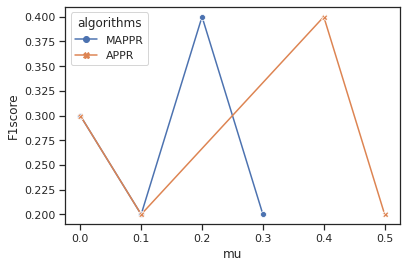

In [35]:
sns.set_theme(style="ticks")
sns.lineplot(data = resultDF,x='mu',y='F1score',hue= 'algorithms',style='algorithms',markers=True,dashes=False)

plt.savefig('test.png')

In [27]:
['sdf' for _ in range(3)]

['sdf', 'sdf', 'sdf']

In [3]:
b[:1]

['2']

In [2]:
# number of nodes n1
n1 = 50
k = 10
p = 0.5
mu = 0.5
def get_q(mu, p, k):
    return float((mu * p) / ((1 - mu) * (k - 1)))


# generate undirected unweighted graph
#G_P = planted_partition_graph(l=k, k=n1, p_in=p, p_out=get_q(mu, p, k), seed=0)
G_P = random_partition_graph(sizes = [50 for _ in range(10)],p_in=p, p_out=get_q(mu, p, k), seed=0)
print(f"Generated the planted partition graph with size: {len(G_P)}")


Generated the planted partition graph with size: 500


In [ ]:
G_L = LFR_benchmark_graph()

In [4]:
len(G_P.edges())

12400

In [5]:
# test the first partion one
one_commu = G_P.graph['partition'][0]

# ouput the graph
with open('testout.txt','wb') as f:
    nx.write_edgelist(G_P,f,data=False)

# output the 
with open("testComu.txt",'w') as f:
    for comm in G_P.graph['partition']:
        f.writelines(' '.join(list(map(lambda x: str(x),comm))))
        f.write("\n")

# test 
# read from txt
detected_comm = list(open(
    "/home/sfy/Documents/VScodeProject/SNAPro/project/localmotif/localmotifcluster/outputComu.txt",
    "r",
).read().strip().split(' '))


In [18]:

# compare with F1score
def cal_Fscore(detected_comm, ground_truth_comm, beta=1):
    """
    input : detected_comm: list from read file wiht all str
            ground_truth_comm: list with community of int

    Given a set of algorithmic communities C and the ground truth communities S, F score measures the relevance
    between the algorithmic communities and the ground truth communities.
    F_beta = (1+beta^2) / beta^2 * (precision(S)*recall(S)) / (precision(S)+recall(S))
    """
    # in case the last one is
    if detected_comm: detected_comm = list(map(lambda x: int(x),detected_comm))
    ground_truth_comm = list(ground_truth_comm)
    print(ground_truth_comm)
    correctly_classified = list(set(detected_comm).intersection(set(ground_truth_comm)))
    precision = len(correctly_classified) / float(len((detected_comm)))
    recall = len(correctly_classified) / float(len(ground_truth_comm))
    if precision != 0 and recall != 0:
        Fscore = (
            (1 + math.sqrt(beta))
            / float(math.sqrt(beta))
            * precision
            * recall
            / float(precision + recall)
        )
    else:
        Fscore = 0

    return Fscore


In [5]:
# read communities from file
detected_communities = list(open(
    "/home/sfy/Documents/VScodeProject/SNAPro/project/localmotif/localmotifcluster/outputComu.txt",
    "r",
).read().strip().split(';'))



In [19]:
scoress = []
for index, communities in enumerate(detected_communities):
    comms_seed = communities.split(',')
    # print(comms_seed)
    scores = list(map(functools.partial(cal_Fscore,ground_truth_comm=G_P.graph['partition'][index],beta=1),comms_seed))
    scoress.append(scores)


ValueError: invalid literal for int() with base 10: ' '

In [10]:
def get_score(ground_truth_comms):
    #
    scores= map(cal_Fscore,detected_communities[:len(detected_communities)-1],G_P.graph['partition'])

scores = list(map(cal_Fscore(detected_comm, ground_truth_comm, beta=1),detected_communities[:len(detected_communities)-1]))

get_score(ground_truth_comms = G_P.graph['partition'])

NameError: name 'cal_Fscore' is not defined

In [56]:
cal_Fscore(detected_comm= detected_comm,ground_truth_comm=one_commu)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


0.3322259136212624